In [150]:
using Pkg
#Pkg.add("PDFIO")
using PDFIO
using DataFrames
using CSV
using Cascadia
using Gumbo
using HTTP
#Pkg.add("Cascadia")
#Pkg.add("Statistics")
#Pkg.add("Metrics")
using ScikitLearn: fit!
using ScikitLearn: predict
using ScikitLearn
using CSV, DataFrames
using TextAnalysis
using CSV
using DataFrames
using Pipe
using Plots
using TypedTables
using PlutoUI
using MLJBase
using Tables
using Markdown
using Metrics
using Statistics

In [151]:
dataset = DataFrame(
  Email=[] ,
  Country=[],
  VAT=[],
  Telephone=[],
  Total_€=[]
)

,Email,Country,VAT,Telephone,Total_€
,Any,Any,Any,Any,Any


In [152]:
page = pdDocGetPage(doc, 1)

PDFIO.PD.PDPageImpl(
PDDoc ==>

CosDoc ==>
	filepath:		/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR LACUS.pdf
	size:			152059
	hasNativeXRefStm:	 false
	Trailer dictionaries: 
	<<
	/Root	31 0 R
	/Size	63
	/Info	62 0 R
	/ID	[<f7a8a58d557b45042219ab89075e2a31> <f7a8a58d557b45042219ab89075e2a31> ]
>>

Catalog:
31 0 obj
<<
	/Version	/1.4
	/Pages	2 0 R
	/Type	/Catalog
>>
endobj

isTagged: none
, 
1 0 obj
<<
	/MediaBox	[0 0 595 842 ]
	/Resources	4 0 R
	/Contents	3 0 R
	/Parent	2 0 R
	/Type	/Page
>>
endobj

, null, nothing, Dict{CosName, PDFIO.PD.PDFont}(), Dict{CosName, PDFIO.PD.PDXObject}())

In [153]:
info2=pdPageExtractText(stdout, page);

     

    GOFACTUUR                                                     




   DATUM                 FACTUURNUMMER       STRNGR.C 

   23/1/2021               6                        Heuzelstraat 34 
                                                      9790 Wortegem-Petegem 
                                                     0494664981 
                                                     Fax: / 
                                                     Strngrclothingcompany@gmail.com 
   FACTUUR AAN:                                        BTW nr. 0729909558 
   LACUS BV                                        BE62 1030 6202 1161 
   BE0776625055 
   LACUS@GMAIL.COM 
   Jan-baptiste davidstraat 
   1 Belgium 
     
     VERKOPER      FUNCTIE         BETALINGSVOORWAARDEN   VERVALDATUM 

                                     Te betalen bij ontvangst               

     
     AANTAL          OMSCHRIJVING     PRIJS PER EENHEID  REGELTOTAAL 
     
     
     1                Bedrukking Trui

In [154]:
function getPDFText(src, out)
    # handle that can be used for subsequence operations on the document.
    doc = pdDocOpen(src)
    
    # Metadata extracted from the PDF document. 
    # This value is retained and returned as the return from the function. 
    docinfo = pdDocGetInfo(doc) 
    open(out, "w") do io
    
        # Returns number of pages in the document       
        npage = pdDocGetPageCount(doc)
        #println(npage)

        for i=1:npage
        
            # handle to the specific page given the number index. 
            page = pdDocGetPage(doc, i)
            #println(i)
            # Extract text from the page and write it to the output file.
            d=pdPageExtractText(io, page)
            println(d)
            #println(io)

        end
    end
    # Close the document handle. 
    # The doc handle should not be used after this call
    pdDocClose(doc)
    return docinfo
end

getPDFText (generic function with 1 method)

In [155]:
doc = pdDocOpen("/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR LACUS.pdf")


PDDoc ==>

CosDoc ==>
	filepath:		/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR LACUS.pdf
	size:			152059
	hasNativeXRefStm:	 false
	Trailer dictionaries: 
	<<
	/Root	31 0 R
	/Size	63
	/Info	62 0 R
	/ID	[<f7a8a58d557b45042219ab89075e2a31> <f7a8a58d557b45042219ab89075e2a31> ]
>>

Catalog:
31 0 obj
<<
	/Version	/1.4
	/Pages	2 0 R
	/Type	/Catalog
>>
endobj

isTagged: none


In [156]:
page = pdDocGetPage(doc, 1)


PDFIO.PD.PDPageImpl(
PDDoc ==>

CosDoc ==>
	filepath:		/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR LACUS.pdf
	size:			152059
	hasNativeXRefStm:	 false
	Trailer dictionaries: 
	<<
	/Root	31 0 R
	/Size	63
	/Info	62 0 R
	/ID	[<f7a8a58d557b45042219ab89075e2a31> <f7a8a58d557b45042219ab89075e2a31> ]
>>

Catalog:
31 0 obj
<<
	/Version	/1.4
	/Pages	2 0 R
	/Type	/Catalog
>>
endobj

isTagged: none
, 
1 0 obj
<<
	/MediaBox	[0 0 595 842 ]
	/Resources	4 0 R
	/Contents	3 0 R
	/Parent	2 0 R
	/Type	/Page
>>
endobj

, null, nothing, Dict{CosName, PDFIO.PD.PDFont}(), Dict{CosName, PDFIO.PD.PDXObject}())

In [157]:
data=pdPageExtractText(stdout,page)

     

    GOFACTUUR                                                     




   DATUM                 FACTUURNUMMER       STRNGR.C 

   23/1/2021               6                        Heuzelstraat 34 
                                                      9790 Wortegem-Petegem 
                                                     0494664981 
                                                     Fax: / 
                                                     Strngrclothingcompany@gmail.com 
   FACTUUR AAN:                                        BTW nr. 0729909558 
   LACUS BV                                        BE62 1030 6202 1161 
   BE0776625055 
   LACUS@GMAIL.COM 
   Jan-baptiste davidstraat 
   1 Belgium 
     
     VERKOPER      FUNCTIE         BETALINGSVOORWAARDEN   VERVALDATUM 

                                     Te betalen bij ontvangst               

     
     AANTAL          OMSCHRIJVING     PRIJS PER EENHEID  REGELTOTAAL 
     
     
     1                Bedrukking Trui

IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(44) open, 0 bytes waiting)))

# DATA PREPERATION

In [158]:
dataset = DataFrame(
  Email=[] ,
  Date=[],
  Country=[],
  VAT=[],
  Telephone=[],
  Total_€=[]
)

,Email,Date,Country,VAT,Telephone,Total_€
,Any,Any,Any,Any,Any,Any


In [159]:
countries= CSV.read("/Users/casper/Desktop/Bachelorproef/countries of the world.csv",DataFrame)

,Country,Region,Population,Area (sq. mi.)
,String,String,Int64,Int64
1,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500
2,Albania,EASTERN EUROPE,3581655,28748
3,Algeria,NORTHERN AFRICA,32930091,2381740
4,American Samoa,OCEANIA,57794,199
5,Andorra,WESTERN EUROPE,71201,468
6,Angola,SUB-SAHARAN AFRICA,12127071,1246700
7,Anguilla,LATIN AMER. & CARIB,13477,102
8,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443
9,Argentina,LATIN AMER. & CARIB,39921833,2766890


In [160]:
pwd()
cd("/Users/casper/Desktop/Bachelorproef/facturen")
pwd()

files=cd(readdir, "/Users/casper/Desktop/Bachelorproef/facturen")

9-element Vector{String}:
 ".DS_Store"
 "FACTUUR LACUS.pdf"
 "FACTUUR- ARNO OCKERMAN2.pdf"
 "FACTUUR- ARNO OCKERMAN3.pdf"
 "FACTUUR- SIEBE.pdf"
 "FACTUUR- VitalVanWelden2.pdf"
 "FACTUURBALVANWAREGEM.pdf"
 "factuur acast.pdf"
 "factuur bal van waregem.pdf"

In [161]:
files # DS_store uitfilteren

9-element Vector{String}:
 ".DS_Store"
 "FACTUUR LACUS.pdf"
 "FACTUUR- ARNO OCKERMAN2.pdf"
 "FACTUUR- ARNO OCKERMAN3.pdf"
 "FACTUUR- SIEBE.pdf"
 "FACTUUR- VitalVanWelden2.pdf"
 "FACTUURBALVANWAREGEM.pdf"
 "factuur acast.pdf"
 "factuur bal van waregem.pdf"

In [162]:
popfirst!(files)

".DS_Store"

In [163]:
y=pwd()
y=y*'/'

"/Users/casper/Desktop/Bachelorproef/facturen/"

In [164]:
y*files[1]

"/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR LACUS.pdf"

In [165]:
x=1
for i in files
    println(y*i)
    if i!=".DS_Store"
        getPDFText(y*i,"text$x")
        x=x+1
    else 
        x=x-1
    end
end

/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR LACUS.pdf
/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR- ARNO OCKERMAN2.pdf
/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR- ARNO OCKERMAN3.pdf
/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR- SIEBE.pdf
/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR- VitalVanWelden2.pdf
/Users/casper/Desktop/Bachelorproef/facturen/FACTUURBALVANWAREGEM.pdf
/Users/casper/Desktop/Bachelorproef/facturen/factuur acast.pdf
/Users/casper/Desktop/Bachelorproef/facturen/factuur bal van waregem.pdf


In [166]:
getPDFText("/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR- ARNO OCKERMAN3.pdf","text1")
getPDFText("/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR- ARNO OCKERMAN2.pdf","text2")
getPDFText("/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR- SIEBE.pdf","text3")
getPDFText("/Users/casper/Desktop/Bachelorproef/facturen/factuur acast.pdf","text4")
getPDFText("/Users/casper/Desktop/Bachelorproef/facturen/FACTUURBALVANWAREGEM.pdf","text5")
getPDFText("/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR- VitalVanWelden2.pdf","text6")
getPDFText("/Users/casper/Desktop/Bachelorproef/facturen/factuur bal van waregem.pdf","text7")
getPDFText("/Users/casper/Desktop/Bachelorproef/facturen/FACTUUR LACUS.pdf","text8")


Dict{String, Union{CDDate, String, CosObject}} with 5 entries:
  "Producer"     => "macOS Versie 12.1 (build 21C52) Quartz PDFContext"
  "CreationDate" => D:20220404083438Z
  "ModDate"      => D:20220404083438Z
  "Creator"      => "Word"
  "Title"        => "Microsoft Word - FACTUUR LACUS.docx"

In [167]:
length(files)

8

In [168]:
l1st=[]
for i in 1:length(files)
    println(i)
    data=open(f->read(f, String), "text$i")
    println(data)
    data=replace.(data, r"\n"=>"")
    println(data)
    rm("text$i")
    push!(l1st,data)
    
end

1
     

     FACTUUR                                                        




     DATUM               FACTUURNUMMER     STRNGR.C 

     26/12/2022            18                     Heuzelstraat 34 
                                                  9790 Wortegem-Petegem 
                                                   0494664981 
                                                   Fax: / 
                                                   Strngrclothingcompany@gmail.com 
     FACTUUR AAN:                                   BTW nr. 0729909558 
     Ockerman Arno                                   BE62 1030 6202 1161 
     Martijn van Torhoutstraat 32 
     201, 9700 Oudenaarde, 
     Belgium 
     0474448833 
     BE0771433476    
     VERKOPER     FUNCTIE         BETALINGSVOORWAARDEN   VERVALDATUM 

                                     Te betalen bij ontvangst              1 MEI ANDERS 20% OP 
                                                               DE PRIJS 
     
     AANTA

        GOFACTUUR                                                             DATUM                     FACTUURNUMMER   STRNGR.C    23/1/2021                   7                     Heuzelstraat 34                                                      9790 Wortegem-Petegem                                                      0494664981                                                      Fax: /                                                      Strngrclothingcompany@gmail.com    FACTUUR AAN:                                        BTW nr. 0729909558                                                      BE62 1030 6202 1161    lennertgrootaerd@gmail.com        Lennert Grootaerd     Sterrestraat 77    8680 Koekelare    BE0725470720        Belgie           VERKOPER      FUNCTIE          BETALINGSVOORWAARDEN   VERVALDATUM                                       Te Betaling binnen 14 dagen. In geval van                                           overschrijding, 5% intrest op het totaalbedrag.   

8
     

    GOFACTUUR                                                     




   DATUM                 FACTUURNUMMER       STRNGR.C 

   23/1/2021               6                        Heuzelstraat 34 
                                                      9790 Wortegem-Petegem 
                                                     0494664981 
                                                     Fax: / 
                                                     Strngrclothingcompany@gmail.com 
   FACTUUR AAN:                                        BTW nr. 0729909558 
   LACUS BV                                        BE62 1030 6202 1161 
   BE0776625055 
   LACUS@GMAIL.COM 
   Jan-baptiste davidstraat 
   1 Belgium 
     
     VERKOPER      FUNCTIE         BETALINGSVOORWAARDEN   VERVALDATUM 

                                     Te betalen bij ontvangst               

     
     AANTAL          OMSCHRIJVING     PRIJS PER EENHEID  REGELTOTAAL 
     
     
     1                Bedrukking Tr

In [169]:
l1st

8-element Vector{Any}:
 "          FACTUUR             " ⋯ 1556 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1562 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1564 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "        GOFACTUUR             " ⋯ 1641 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1511 bytes ⋯ "                              "
 "          FACTUUR             " ⋯ 1432 bytes ⋯ "                              "
 "          FACTUUR             " ⋯ 1470 bytes ⋯ "                              "
 "         GOFACTUUR            " ⋯ 1479 bytes ⋯ "                              "

In [170]:
countries=countries[!,1]
countries=replace.(countries, r" "=>"")

227-element Vector{String}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "AmericanSamoa"
 "Andorra"
 "Angola"
 "Anguilla"
 "Antigua&Barbuda"
 "Argentina"
 "Armenia"
 "Aruba"
 "Australia"
 "Austria"
 ⋮
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "VirginIslands"
 "WallisandFutuna"
 "WestBank"
 "WesternSahara"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [214]:

for i in 1:length(l1st)
    list_1=split(l1st[i])

    words=filter(contains(r"a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z"), list_1)
 
    euro=filter(contains(r"[€]"), list_1)
    email=filter(contains(r"[@]"), list_1)
    datum=filter(contains(r"/"), list_1)
    println(datum)
    k=1
    for i in datum
        if i=="/"  
            splice!(datum,k) 
        end
        k=k+1
    end
        
    x=0
    postcode=[]
    tel=[]
    BTW=[]
    land=""
    bool=false




    
    for i in list_1
        for x in values(countries)
            i=replace.(i, r" "=>"")
            #println(i)
            if uppercase(x)==uppercase(i)
                land=x
                bool=true
            else 
            end
        end           

        if length(i)== 4
                push!(postcode,i)
        end
        

        if length(i)==10 || length(i)==12
           if startswith(i,"+32") ==true || startswith(i,"04") ==true 
                push!(tel,i)
            end 
            if startswith(i,"BE") ==true 
                push!(BTW,i)
            end

            if startswith(i,"07")==true 
                push!(BTW,"BE$i") 
            end 
        end 
    end
    if uppercase(last(email))=="STRNGRCLOTHINGCOMPANY@GMAIL.COM"
        push!(email,"Unknown")
    end
    if uppercase(last(tel))=="0494664981"
        push!(tel,"Unknown")
    end
    if uppercase(last(BTW))=="BE0771433476"
        push!(BTW,"Unknown")
    
    end
    if bool==false
        land="Unknown"
    end
    println(land)
    push!(dataset,[last(email),last(datum),land,last(BTW),last(tel),last(euro)])



end

SubString{String}["26/12/2022", "/"]
Belgium
SubString{String}["26/12/2022", "/"]
Belgium
SubString{String}["10/2/2022", "/"]
Belgium
SubString{String}["23/1/2021", "/"]
Unknown
SubString{String}["1/2/2022", "/"]
Unknown
SubString{String}["3/12/2021", "/"]
Belgium
SubString{String}["10/1/2021", "/"]
Belgium
SubString{String}["23/1/2021", "/"]
Belgium


In [215]:
dataset

,Email,Date,Country,VAT,Telephone,Total_€
,Any,Any,Any,Any,Any,Any
1,Unknown,26/12/2022,Belgium,Unknown,0474448833,€224
2,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160€
3,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,"54,99€"
4,lennertgrootaerd@gmail.com,23/1/2021,Unknown,BE0725470720,Unknown,195€
5,LACUS@gmail.com,1/2/2022,Unknown,BE0776625055,Unknown,16€
6,vital@gmail.com,3/12/2021,Belgium,BE0753524209,Unknown,55€
7,Info@balvantwaregemse.be,10/1/2021,Belgium,BE0729909558,Unknown,597€
8,LACUS@GMAIL.COM,23/1/2021,Belgium,BE0776625055,Unknown,75€
9,Unknown,26/12/2022,Belgium,Unknown,0474448833,€224


# ANALYSE

In [216]:
x=1
for i in values(dataset[!,"Email"])
    if i=="Unknown"
        delete!(dataset,x)        
    end

    x=x+1
end

In [217]:
dataset

,Email,Date,Country,VAT,Telephone,Total_€
,Any,Any,Any,Any,Any,Any
1,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160€
2,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,"54,99€"
3,lennertgrootaerd@gmail.com,23/1/2021,Unknown,BE0725470720,Unknown,195€
4,LACUS@gmail.com,1/2/2022,Unknown,BE0776625055,Unknown,16€
5,vital@gmail.com,3/12/2021,Belgium,BE0753524209,Unknown,55€
6,Info@balvantwaregemse.be,10/1/2021,Belgium,BE0729909558,Unknown,597€
7,LACUS@GMAIL.COM,23/1/2021,Belgium,BE0776625055,Unknown,75€
8,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160€
9,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,"54,99€"


In [218]:
float_eur=[]
for i in dataset[!,6]
    i=replace(i, "€" => "")
    i=replace(i, "," => ".")
    push!(float_eur,parse(Float64,i))
end

In [219]:
float_eur

280-element Vector{Any}:
 160.0
  54.99
 195.0
  16.0
  55.0
 597.0
  75.0
 160.0
  54.99
 195.0
  16.0
  55.0
 597.0
   ⋮
 195.0
  16.0
  55.0
 597.0
  75.0
 160.0
  54.99
 195.0
  16.0
  55.0
 597.0
  75.0

In [220]:
dataset.Total_€=float_eur

280-element Vector{Any}:
 160.0
  54.99
 195.0
  16.0
  55.0
 597.0
  75.0
 160.0
  54.99
 195.0
  16.0
  55.0
 597.0
   ⋮
 195.0
  16.0
  55.0
 597.0
  75.0
 160.0
  54.99
 195.0
  16.0
  55.0
 597.0
  75.0

In [221]:
dataset

,Email,Date,Country,VAT,Telephone,Total_€
,Any,Any,Any,Any,Any,Any
1,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160.0
2,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,54.99
3,lennertgrootaerd@gmail.com,23/1/2021,Unknown,BE0725470720,Unknown,195.0
4,LACUS@gmail.com,1/2/2022,Unknown,BE0776625055,Unknown,16.0
5,vital@gmail.com,3/12/2021,Belgium,BE0753524209,Unknown,55.0
6,Info@balvantwaregemse.be,10/1/2021,Belgium,BE0729909558,Unknown,597.0
7,LACUS@GMAIL.COM,23/1/2021,Belgium,BE0776625055,Unknown,75.0
8,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160.0
9,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,54.99


In [222]:
push!(dataset,["Richard@hotmail.fr","22/3/2021","France","FR4847220377","+33984535111",120.5])
push!(dataset,["Victor@hotmail.fr","31/3/2021","France","FR4847220373","+33987337111",100.5])
push!(dataset,["Melody@outlook.fr","01/3/2021","France","FR4847260373","+33447337111",119.5])
push!(dataset,["Henk@gmail.fr","22/1/2021","France","FR424750077","+33987336611",15.5])
push!(dataset,["Kyani@DPD.fr","12/2/2021","France","FR48272250357","+33987337151",59.5])
push!(dataset,["Hugo@hotmail.fr","24/2/2021","France","FR13472243077","+33987337131",29.8])



,Email,Date,Country,VAT,Telephone,Total_€
,Any,Any,Any,Any,Any,Any
1,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160.0
2,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,54.99
3,lennertgrootaerd@gmail.com,23/1/2021,Unknown,BE0725470720,Unknown,195.0
4,LACUS@gmail.com,1/2/2022,Unknown,BE0776625055,Unknown,16.0
5,vital@gmail.com,3/12/2021,Belgium,BE0753524209,Unknown,55.0
6,Info@balvantwaregemse.be,10/1/2021,Belgium,BE0729909558,Unknown,597.0
7,LACUS@GMAIL.COM,23/1/2021,Belgium,BE0776625055,Unknown,75.0
8,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160.0
9,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,54.99


In [223]:
describe(dataset)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Email,,Arno@gmail.com,,vital@gmail.com,0,Any
2,Date,,01/3/2021,,31/3/2021,0,Any
3,Country,,Belgium,,Unknown,0,Any
4,VAT,,BE0725470720,,Unknown,0,Any
5,Telephone,,+32483446663,,Unknown,0,Any
6,Total_€,162.814,15.5,75.0,597.0,0,Any


In [224]:
dataset.Country

286-element Vector{Any}:
 "Belgium"
 "Belgium"
 "Unknown"
 "Unknown"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Unknown"
 "Unknown"
 "Belgium"
 "Belgium"
 ⋮
 "Belgium"
 "Unknown"
 "Unknown"
 "Belgium"
 "Belgium"
 "Belgium"
 "France"
 "France"
 "France"
 "France"
 "France"
 "France"

In [225]:
dataset

,Email,Date,Country,VAT,Telephone,Total_€
,Any,Any,Any,Any,Any,Any
1,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160.0
2,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,54.99
3,lennertgrootaerd@gmail.com,23/1/2021,Unknown,BE0725470720,Unknown,195.0
4,LACUS@gmail.com,1/2/2022,Unknown,BE0776625055,Unknown,16.0
5,vital@gmail.com,3/12/2021,Belgium,BE0753524209,Unknown,55.0
6,Info@balvantwaregemse.be,10/1/2021,Belgium,BE0729909558,Unknown,597.0
7,LACUS@GMAIL.COM,23/1/2021,Belgium,BE0776625055,Unknown,75.0
8,Arno@gmail.com,26/12/2022,Belgium,Unknown,Unknown,160.0
9,Sbridoux.business@gmail.com,10/2/2022,Belgium,BE0775755025,+32483446663,54.99


In [226]:
using Dates
dataset.Date = Date.(dataset.Date, "dd/mm/yyyy")

286-element Vector{Date}:
 2022-12-26
 2022-02-10
 2021-01-23
 2022-02-01
 2021-12-03
 2021-01-10
 2021-01-23
 2022-12-26
 2022-02-10
 2021-01-23
 2022-02-01
 2021-12-03
 2021-01-10
 ⋮
 2022-02-10
 2021-01-23
 2022-02-01
 2021-12-03
 2021-01-10
 2021-01-23
 2021-03-22
 2021-03-31
 2021-03-01
 2021-01-22
 2021-02-12
 2021-02-24

In [227]:
dataset

,Email,Date,Country,VAT,Telephone,Total_€
,Any,Date,Any,Any,Any,Any
1,Arno@gmail.com,2022-12-26,Belgium,Unknown,Unknown,160.0
2,Sbridoux.business@gmail.com,2022-02-10,Belgium,BE0775755025,+32483446663,54.99
3,lennertgrootaerd@gmail.com,2021-01-23,Unknown,BE0725470720,Unknown,195.0
4,LACUS@gmail.com,2022-02-01,Unknown,BE0776625055,Unknown,16.0
5,vital@gmail.com,2021-12-03,Belgium,BE0753524209,Unknown,55.0
6,Info@balvantwaregemse.be,2021-01-10,Belgium,BE0729909558,Unknown,597.0
7,LACUS@GMAIL.COM,2021-01-23,Belgium,BE0776625055,Unknown,75.0
8,Arno@gmail.com,2022-12-26,Belgium,Unknown,Unknown,160.0
9,Sbridoux.business@gmail.com,2022-02-10,Belgium,BE0775755025,+32483446663,54.99


# LOGISTIC REGRESSION

In [228]:
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [229]:
#irs_x=Matrix(dataset[!,[1,2,4,5,6]])
irs_x=Matrix(dataset[!,[6]])

286×1 Matrix{Any}:
 160.0
  54.99
 195.0
  16.0
  55.0
 597.0
  75.0
 160.0
  54.99
 195.0
  16.0
  55.0
 597.0
   ⋮
  54.99
 195.0
  16.0
  55.0
 597.0
  75.0
 120.5
 100.5
 119.5
  15.5
  59.5
  29.8

In [238]:
X_1= convert(Array,irs_x)
Y_1= convert(Array,dataset[!,3]);# Target

In [239]:
@sk_import model_selection: train_test_split

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore /Users/casper/.julia/packages/ScikitLearn/ssekP/src/Skcore.jl:179


PyObject <function train_test_split at 0x163421550>

In [240]:
x_train,x_test,y_train,y_test=train_test_split(X_1,Y_1,test_size=.3,random_state=1)

4-element Vector{Array}:
 [55.0; 55.0; … ; 55.0; 195.0;;]
 [160.0; 597.0; … ; 54.99; 54.99;;]
 ["Belgium", "Belgium", "Belgium", "Belgium", "Unknown", "Unknown", "Belgium", "Belgium", "Belgium", "Unknown"  …  "Belgium", "Belgium", "Unknown", "Belgium", "Belgium", "Belgium", "Unknown", "Unknown", "Belgium", "Unknown"]
 ["Belgium", "Belgium", "Belgium", "Belgium", "Unknown", "Belgium", "Unknown", "Belgium", "Belgium", "Unknown"  …  "Unknown", "Unknown", "Belgium", "Belgium", "Belgium", "Belgium", "Unknown", "Belgium", "Belgium", "Belgium"]

In [241]:
println("Trainingset= ",nrows(x_train),",Testset= ", nrows(y_test))


Trainingset= 200,Testset= 86


In [242]:
log_reg2= LogisticRegression()

PyObject LogisticRegression()

In [243]:
fit!(log_reg2,x_train,y_train)

PyObject LogisticRegression()

In [244]:
predictions=predict(log_reg2,x_test)

86-element Vector{Any}:
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 ⋮
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"

In [245]:
@sk_import metrics: accuracy_score
log_reg_2_accuracy= accuracy_score(predictions,y_test)

0.6627906976744186

# DECISION TREES

In [246]:
@sk_import tree:DecisionTreeClassifier
tree_model= DecisionTreeClassifier(max_depth=3)

PyObject DecisionTreeClassifier(max_depth=3)

In [247]:
fit!(tree_model,x_train,y_train)

PyObject DecisionTreeClassifier(max_depth=3)

In [248]:
predictions=predict(tree_model,x_test)

86-element Vector{Any}:
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Unknown"
 "Belgium"
 "Unknown"
 "Belgium"
 "Belgium"
 "Unknown"
 "Belgium"
 "Unknown"
 "Belgium"
 ⋮
 "Belgium"
 "Belgium"
 "Unknown"
 "Unknown"
 "Belgium"
 "Belgium"
 "Belgium"
 "Belgium"
 "Unknown"
 "Belgium"
 "Belgium"
 "Belgium"

In [249]:
tree_model_acc_score= accuracy_score(predictions,y_test)

0.9767441860465116

In [122]:
dataset

,Email,Date,Country,VAT,Telephone,Total_€
,Any,Date,Any,Any,Any,Any
1,Arno@gmail.com,2022-12-26,Belgium,Unknown,Unknown,160.0
2,Sbridoux.business@gmail.com,2022-02-10,Belgium,BE0775755025,+32483446663,54.99
3,lennertgrootaerd@gmail.com,2021-01-23,Unknown,BE0725470720,Unknown,195.0
4,LACUS@gmail.com,2022-02-01,Unknown,BE0776625055,Unknown,16.0
5,vital@gmail.com,2021-12-03,Belgium,BE0753524209,Unknown,55.0
6,Info@balvantwaregemse.be,2021-01-10,Belgium,BE0729909558,Unknown,597.0
7,LACUS@GMAIL.COM,2021-01-23,Belgium,BE0776625055,Unknown,75.0
8,Arno@gmail.com,2022-12-26,Belgium,Unknown,Unknown,160.0
9,Sbridoux.business@gmail.com,2022-02-10,Belgium,BE0775755025,+32483446663,54.99


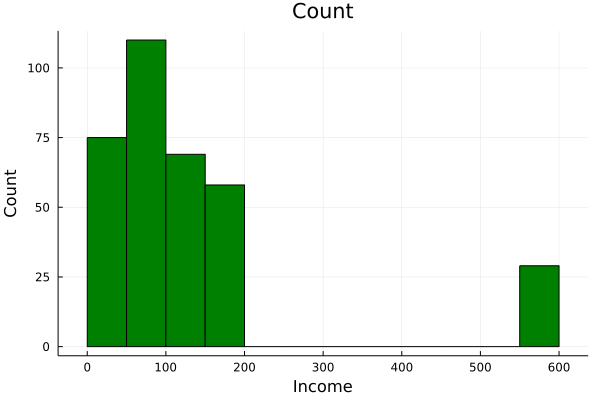

In [123]:
histogram(
    dataset[!,:Date],
    dataset[!, :Total_€],
    title = "Count",
    xlabel = "Income",
    ylabel = "Count",
    color="green",
    legend = false) 


In [124]:
df=combine(groupby(dataset,:Country), nrow => :count)

,Country,count
,Any,Int64
1,Belgium,145
2,Unknown,58
3,France,138


In [125]:
df

,Country,count
,Any,Int64
1,Belgium,145
2,Unknown,58
3,France,138


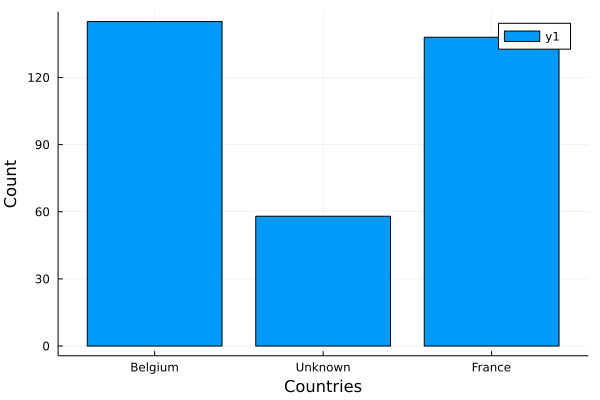

In [126]:
using Plots
p = bar(df[!,:Country],df[!,:count])
ylabel!("Count")
xlabel!("Countries")



In [127]:
VAT=[]
for i in values(dataset[!,"VAT"])
    println(i)
    if i != "Unknown"
        push!(VAT,SubString(i, 4, 12))
    end
end

Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE0753524209
BE0729909558
BE0776625055
Unknown
BE0775755025
BE0725470720
BE0776625055
BE07535

LoadError: BoundsError: attempt to access 11-codeunit String at index [4:12]

In [128]:
VAT

177-element Vector{Any}:
 "775755025"
 "725470720"
 "776625055"
 "753524209"
 "729909558"
 "776625055"
 "775755025"
 "725470720"
 "776625055"
 "753524209"
 "729909558"
 "776625055"
 "775755025"
 ⋮
 "753524209"
 "729909558"
 "776625055"
 "775755025"
 "725470720"
 "776625055"
 "753524209"
 "729909558"
 "776625055"
 "847220377"
 "847220373"
 "847260373"

In [129]:
BTW_gegevens_uitgaande_facturen = DataFrame(
  Name=[] ,
  VAT=[],
  Creation_Date=[],
  Address=[],
  Function=[],
  Sector=[]
)

,Name,VAT,Creation_Date,Address,Function,Sector
,Any,Any,Any,Any,Any,Any


# SCRAPING

In [130]:
for i in values(VAT)
    url="https://trendstop.knack.be/nl/detail/$i"
    r=HTTP.get(url)
    h= parsehtml(String(r.body))
    body=h.root[2]
    html=body[1][6][3][2][2][2][1][1][1]
    BTW_nr=html[1][1][1][2][1].text
    BTW_nr=replace.(BTW_nr, r"\n"=>"")
    BTW_nr=replace.(BTW_nr, r" "=>"")
    Adres=html[1][1][2][2][1][1].text
    Adres=replace.(Adres, r"\n"=>"")
    if Adres=="Niet publiek zichtbaar omwille van de persoonlijke levenssfeer"
        Adres=html[1][1][2][2][2][1].text
    end
    Naam=html[1][1][4][2][1][1].text
    Rechtsvorm=html[1][1][5][2][1].text
    Rechtsvorm=replace.(Rechtsvorm, r"\n"=>"")
    Rechtsvorm=replace.(Rechtsvorm, r" "=>"")
    Oprichtingsdatum=html[1][1][7][2][1].text
    Oprichtingsdatum=replace.(Oprichtingsdatum, r"\n"=>"")
    Oprichtingsdatum=replace.(Oprichtingsdatum, r" "=>"")
    Sector=html[2][1][2][2][1][1].text
    push!(BTW_gegevens_uitgaande_facturen,[Naam,BTW_nr,Oprichtingsdatum,Adres,Rechtsvorm,Sector])
end

LoadError: BoundsError: attempt to access 2-element Vector{HTMLNode} at index [3]

In [131]:
BTW_gegevens_uitgaande_facturen

,Name,VAT,Creation_Date,Address,Function
,Any,Any,Any,Any,Any
1,BRIDOUX SIEBE,BE0775.755.025,18/10/2021,8760 MEULEBEKE,"Zelfstandige,handwerksman-fysischepersoon"
2,GROOTAERD LENNERT,BE0725.470.720,17/04/2019,8680 KOEKELARE,"Zelfstandige,handwerksman-fysischepersoon"
3,LACUS,BE0776.625.055,27/10/2021,Jan-Baptiste Davidstr 1,Beslotenvennootschap
4,VAN WELDEN VITAL,BE0753.524.209,1/08/2020,8552 MOEN,"Zelfstandige,handwerksman-fysischepersoon"
5,CORNELIS CASPER,BE0729.909.558,8/07/2019,9790 OOIKE,"Zelfstandige,handwerksman-fysischepersoon"
6,LACUS,BE0776.625.055,27/10/2021,Jan-Baptiste Davidstr 1,Beslotenvennootschap
7,BRIDOUX SIEBE,BE0775.755.025,18/10/2021,8760 MEULEBEKE,"Zelfstandige,handwerksman-fysischepersoon"
8,GROOTAERD LENNERT,BE0725.470.720,17/04/2019,8680 KOEKELARE,"Zelfstandige,handwerksman-fysischepersoon"
9,LACUS,BE0776.625.055,27/10/2021,Jan-Baptiste Davidstr 1,Beslotenvennootschap


In [132]:
url="https://trendstop.knack.be/nl/detail/$i"
r=HTTP.get(url)

LoadError: UndefVarError: i not defined

In [133]:
h= parsehtml(String(r.body))

LoadError: UndefVarError: r not defined

In [134]:
body=h.root[2]

LoadError: UndefVarError: h not defined

In [135]:
html=body[1][6][3][2][2][2][1][1][1]

LoadError: UndefVarError: body not defined

In [136]:
BTW_nr=html[1][1][1][2][1].text
BTW_nr=replace.(BTW_nr, r"\n"=>"")
BTW_nr=replace.(BTW_nr, r" "=>"")

LoadError: MethodError: no method matching getindex(::typeof(html), ::Int64)

In [137]:
Adres=html[1][1][2][2][1][1].text
Adres=replace.(Adres, r"\n"=>"")
if Adres=="Niet publiek zichtbaar omwille van de persoonlijke levenssfeer"
    Adres=html[1][1][2][2][2][1].text
end

LoadError: MethodError: no method matching getindex(::typeof(html), ::Int64)

In [138]:
Naam=html[1][1][4][2][1][1].text

LoadError: MethodError: no method matching getindex(::typeof(html), ::Int64)

In [139]:
Rechtsvorm=html[1][1][5][2][1].text
Rechtsvorm=replace.(Rechtsvorm, r"\n"=>"")
Rechtsvorm=replace.(Rechtsvorm, r" "=>"")

LoadError: MethodError: no method matching getindex(::typeof(html), ::Int64)

In [140]:
Oprichtingsdatum=html[1][1][7][2][1].text
Oprichtingsdatum=replace.(Oprichtingsdatum, r"\n"=>"")
Oprichtingsdatum=replace.(Oprichtingsdatum, r" "=>"")

LoadError: MethodError: no method matching getindex(::typeof(html), ::Int64)

In [141]:
Sector=html[2][1][2][2][1][1].text

LoadError: MethodError: no method matching getindex(::typeof(html), ::Int64)

In [142]:
@sk_import model_selection: train_test_split

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore /Users/casper/.julia/packages/ScikitLearn/ssekP/src/Skcore.jl:179


PyObject <function train_test_split at 0x163421550>

In [143]:
x_train,x_test,y_train,y_test=train_test_split(iris_x,iris_y,test_size=.3,random_state=1)

LoadError: UndefVarError: iris_x not defined

In [144]:
nrow(dataset)

341

In [145]:
words=filter(contains(r"a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z"), l1st)

8-element Vector{Any}:
 "          FACTUUR             " ⋯ 1556 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1562 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1564 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "        GOFACTUUR             " ⋯ 1641 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1511 bytes ⋯ "                              "
 "          FACTUUR             " ⋯ 1432 bytes ⋯ "                              "
 "          FACTUUR             " ⋯ 1470 bytes ⋯ "                              "
 "         GOFACTUUR            " ⋯ 1479 bytes ⋯ "                              "

In [146]:
euro=filter(contains(r"[€]"), l1st)
email=filter(contains(r"[@]"), l1st)

8-element Vector{Any}:
 "          FACTUUR             " ⋯ 1556 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1562 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1564 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "        GOFACTUUR             " ⋯ 1641 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1511 bytes ⋯ "                              "
 "          FACTUUR             " ⋯ 1432 bytes ⋯ "                              "
 "          FACTUUR             " ⋯ 1470 bytes ⋯ "                              "
 "         GOFACTUUR            " ⋯ 1479 bytes ⋯ "                              "

In [147]:
euro

8-element Vector{Any}:
 "          FACTUUR             " ⋯ 1556 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1562 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1564 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "        GOFACTUUR             " ⋯ 1641 bytes ⋯ "LGEMENE VOORWAARDEN           "
 "          FACTUUR             " ⋯ 1511 bytes ⋯ "                              "
 "          FACTUUR             " ⋯ 1432 bytes ⋯ "                              "
 "          FACTUUR             " ⋯ 1470 bytes ⋯ "                              "
 "         GOFACTUUR            " ⋯ 1479 bytes ⋯ "                              "

In [55]:
countries=countries[!,1]

LoadError: ArgumentError: invalid index: ! of type typeof(!)

In [56]:
countries[20:60]

41-element Vector{String}:
 "Belgium"
 "Belize"
 "Benin"
 "Bermuda"
 "Bhutan"
 "Bolivia"
 "Bosnia&Herzegovina"
 "Botswana"
 "Brazil"
 "BritishVirginIs."
 "Brunei"
 "Bulgaria"
 "BurkinaFaso"
 ⋮
 "CostaRica"
 "Coted'Ivoire"
 "Croatia"
 "Cuba"
 "Cyprus"
 "CzechRepublic"
 "Denmark"
 "Djibouti"
 "Dominica"
 "DominicanRepublic"
 "EastTimor"
 "Ecuador"

In [37]:
countries=replace.(countries, r" "=>"")

227-element Vector{String}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "AmericanSamoa"
 "Andorra"
 "Angola"
 "Anguilla"
 "Antigua&Barbuda"
 "Argentina"
 "Armenia"
 "Aruba"
 "Australia"
 "Austria"
 ⋮
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "VirginIslands"
 "WallisandFutuna"
 "WestBank"
 "WesternSahara"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [38]:
x=0
postcode=[]
tel=[]
BTW=[]
land=""

for i in l1st
    for x in values(countries)
        #println(i)
        i=replace.(i, r" "=>"")
        if uppercase(x)==uppercase(i)
            land=x
        end
    end           
        
    if length(i)== 4
            push!(postcode,i)
    end
    
    if length(i)==10 || length(i)==12
       if startswith(i,"+32") ==true || startswith(i,"04") ==true 
            push!(tel,i)
        end 
        
        if startswith(i,"07")==true || startswith(i,"BE") ==true 
            push!(BTW,i) 
        end 
        
        
    end 
        
end




In [39]:
tel

Any[]

In [40]:
BTW

Any[]

In [54]:
push!(dataset,[0,0,0,0,0])

,Email,Country,VAT,Telephone,Total_€
,Any,Any,Any,Any,Any
1,0,0,0,0,0


In [270]:
using TextAnalysis: NaiveBayesClassifier, fit!, predict
using TextAnalysis

function create_string_doc(s)
    sd = StringDocument(s)
    op = 0x00
    op |= strip_punctuation
    op |= strip_stopwords
    op |= strip_html_tags
    prepare!(sd, op)
    stem!(sd)
    return sd
end

df2= DataFrame(Name=["siebren sewaest","bert verdonck","factuur","datum","totaal","22","siebren sewaest","bert verdonck","factuur","datum","totaal","blb"],Result=["YES","YES","NO","NO","NO","NO","YES","YES","NO","NO","NO","NO"])
model = let
    Results = unique(df2.Result)
    nbc = NaiveBayesClassifier(Results)
    for (Name, class) in zip(df2.Name , df2.Result)
        sd = create_string_doc(Name)
        fit!(nbc, sd, class)
    end
    println(nbc)
    nbc
end;


NaiveBayesClassifier{String}(["sewaest", "siebren", "verdonck", "bert", "factuur", "datum", "totaal", "22", "blb"], ["YES", "NO"], [3 1; 3 1; 3 1; 3 1; 1 3; 1 3; 1 3; 1 2; 1 2])


In [271]:
df2

,Name,Result
,String,String
1,siebren sewaest,YES
2,bert verdonck,YES
3,factuur,NO
4,datum,NO
5,totaal,NO
6,22,NO
7,siebren sewaest,YES
8,bert verdonck,YES
9,factuur,NO


In [272]:
function test_model(model, l1st) # Bayes method
    df = DataFrame(text = l1st)
    df.doc = TextAnalysis.text.(create_string_doc.(l1st))
    df.analysis = predict.(Ref(model), df.doc)
    print(df.analysis)
    df.YES = getindex.(df.analysis, "YES")
    df.NO = getindex.(df.analysis, "NO")
    select!(df, Not(:analysis))
    return df
end;

In [273]:
let
tweets = [
    "Bert",
    "Factuur",
    "just ok",
    "Hai",
    "i hate this game"]
    test_model(model, tweets)
end



[Dict("NO" => 0.25, "YES" => 0.7500000000000001), Dict("NO" => 0.7500000000000001, "YES" => 0.25), Dict("NO" => 0.5, "YES" => 0.5), Dict("NO" => 0.5, "YES" => 0.5), Dict("NO" => 0.5, "YES" => 0.5)]

,text,doc,YES,NO
,String,String,Float64,Float64
1,Bert,Bert,0.75,0.25
2,Factuur,Factuur,0.25,0.75
3,just ok,ok,0.5,0.5
4,Hai,Hai,0.5,0.5
5,i hate this game,hate game,0.5,0.5
